In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


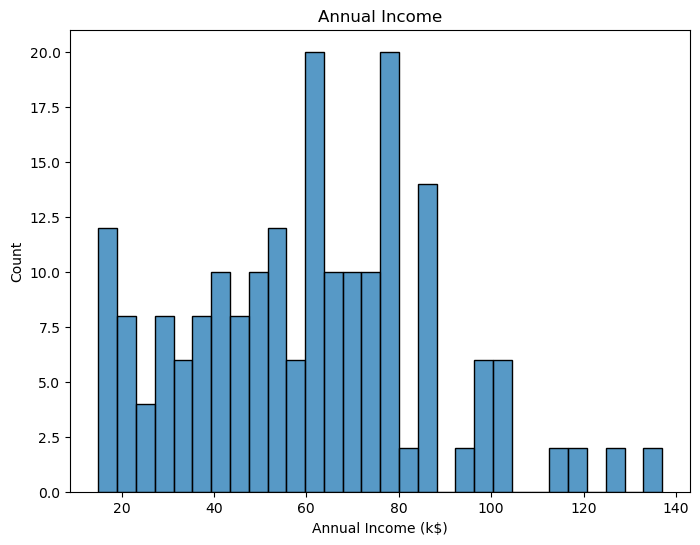

In [7]:
plt.figure(figsize=(8,6))
sns.histplot(df['Annual Income (k$)'],bins=30)
plt.title('Annual Income')
plt.show()

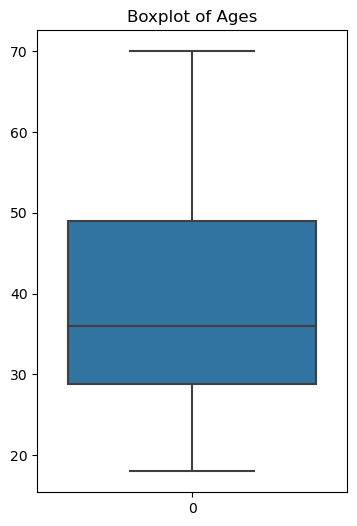

In [8]:
plt.figure(figsize=(4,6))
sns.boxplot(df['Age'])
plt.title('Boxplot of Ages')
plt.show()

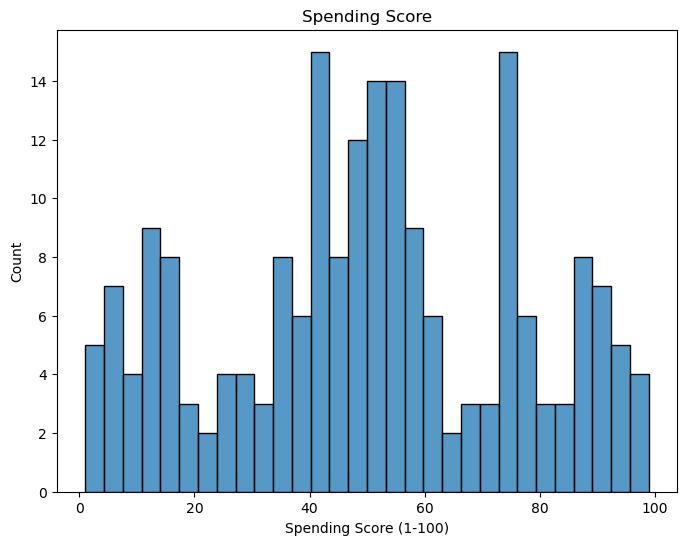

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(df['Spending Score (1-100)'],bins=30)
plt.title('Spending Score')
plt.show()

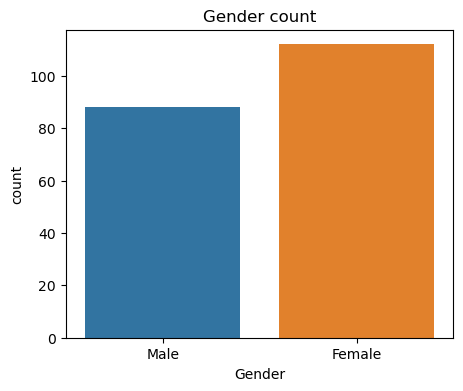

In [10]:
plt.figure(figsize=(5,4))
sns.countplot(x = df['Gender'])
plt.title('Gender count')
plt.show()

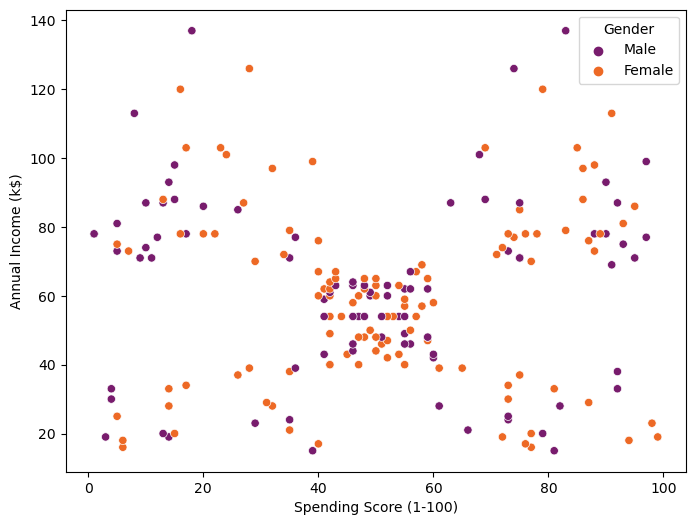

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Spending Score (1-100)', y = 'Annual Income (k$)', hue = 'Gender', data = df, palette='inferno')
plt.show()

## Pre processing

In [12]:
df.drop('CustomerID',axis=1,inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df),columns=df.columns)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


## Clustering

In [15]:
from sklearn.cluster import KMeans
max_clusters = 30
kmeans = [KMeans(n_clusters=i, n_init=10) for i in range(1,max_clusters)]
inertias = [kmeans[i].fit(df).inertia_ for i in range(len(kmeans))]

C:\Users\Jeet Kavaiya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jeet Kavaiya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jeet Kavaiya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jeet Kavaiya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to 

C:\Users\Jeet Kavaiya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


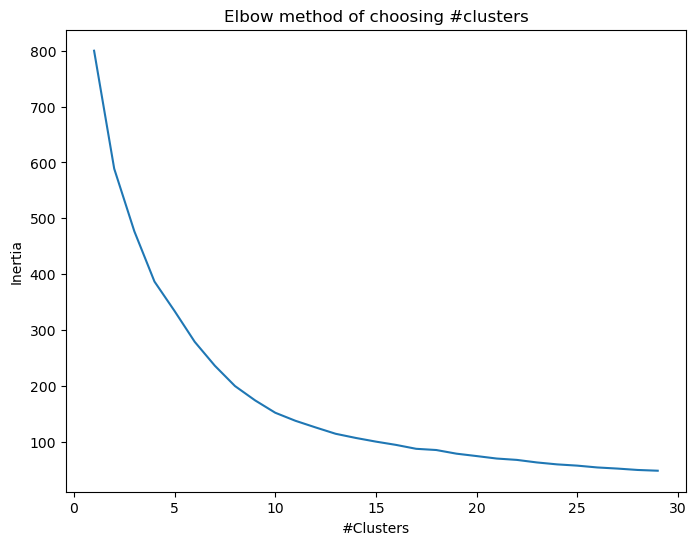

In [16]:
plt.figure(figsize=(8,6))
plt.plot(range(1,max_clusters), inertias)
plt.title('Elbow method of choosing #clusters')
plt.xlabel('#Clusters')
plt.ylabel('Inertia')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=10, n_init=10)
kmeans.fit(df)

C:\Users\Jeet Kavaiya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=10, n_init=10)

In [18]:
clusters = kmeans.predict(df)
clusters

array([0, 0, 8, 7, 8, 7, 8, 7, 3, 7, 3, 7, 8, 7, 8, 0, 8, 0, 3, 7, 0, 0,
       8, 0, 8, 0, 8, 0, 8, 7, 3, 7, 3, 0, 8, 7, 8, 7, 8, 7, 1, 0, 3, 6,
       8, 7, 1, 6, 6, 6, 1, 0, 6, 3, 1, 3, 1, 3, 6, 3, 3, 0, 1, 1, 3, 0,
       1, 1, 0, 6, 3, 1, 1, 1, 3, 0, 1, 0, 6, 1, 3, 0, 3, 1, 6, 3, 1, 6,
       6, 1, 1, 0, 3, 6, 6, 0, 1, 6, 3, 0, 6, 1, 3, 0, 3, 6, 1, 3, 3, 3,
       3, 6, 6, 0, 6, 6, 1, 1, 1, 1, 0, 6, 6, 9, 6, 4, 2, 9, 3, 9, 2, 9,
       6, 4, 2, 4, 5, 9, 2, 4, 5, 9, 6, 4, 2, 9, 2, 4, 5, 9, 2, 9, 5, 4,
       5, 4, 2, 4, 2, 4, 5, 4, 2, 4, 2, 4, 2, 4, 5, 9, 2, 9, 2, 9, 5, 4,
       2, 9, 2, 9, 5, 4, 2, 4, 5, 9, 5, 9, 5, 4, 5, 4, 2, 4, 5, 4, 5, 9,
       2, 9])

## PCA

In [19]:
#We will vizualize the PCAs for the 4 features
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df = pd.DataFrame(pca.fit_transform(df),columns=['PCA1','PCA2'])
df

,PCA1,PCA2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


In [20]:
kmeans.cluster_centers_

array([[ 1.12815215, -0.97602698, -0.73705168,  0.41603773],
       [-0.88640526,  1.09300668, -0.27940022, -0.02639866],
       [ 1.12815215, -0.02700694,  0.96701244, -1.39716754],
       [ 1.12815215,  1.43505777, -0.45298304, -0.40195247],
       [-0.88640526, -0.47793198,  0.97284787,  1.22158511],
       [-0.88640526,  0.41265847,  1.21277   , -1.11029664],
       [-0.88640526, -0.78153925, -0.12214217, -0.11957041],
       [-0.88640526, -0.96084556, -1.33087991,  1.17778643],
       [-0.7425083 ,  0.16967696, -1.31640908, -1.1668652 ],
       [ 1.12815215, -0.39989994,  1.01344075,  1.26040667]])

## 2D cluster centering with PCA

In [22]:
pca_centers = pca.transform(kmeans.cluster_centers_)
pca_centers

C:\Users\Jeet Kavaiya\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[-0.68838314,  0.28733559],
       [ 0.56402657, -0.88554419],
       [ 1.19961046,  1.30582744],
       [ 1.5303687 ,  0.17028966],
       [-1.38150389,  0.3644368 ],
       [ 0.83149037,  0.21501655],
       [-0.662429  , -0.58044771],
       [-1.6696024 , -1.35294268],
       [ 0.75229959, -1.61087948],
       [-0.88272588,  1.65431318]])

In [23]:
df['clusters'] = clusters
df

,PCA1,PCA2,clusters
0,-0.406383,-0.520714,0
1,-1.427673,-0.367310,0
2,0.050761,-1.894068,8
3,-1.694513,-1.631908,7
4,-0.313108,-1.810483,8
...,...,...,...
195,-1.179572,1.324568,4
196,0.672751,1.221061,5
197,-0.723719,2.765010,9
198,0.767096,2.861930,2


## Visualizing the clusters

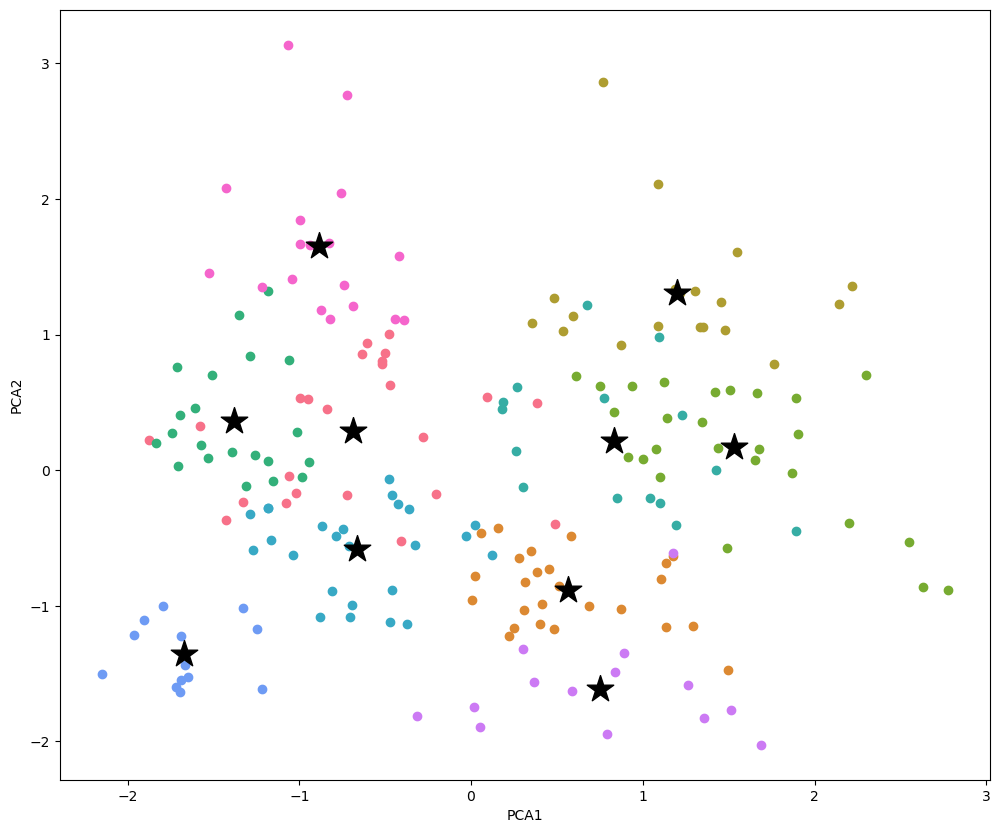

In [24]:
plt.figure(figsize=(12,10))

colors = list(sns.color_palette("husl", 10))
for i in range(10):
    plt.scatter(df[df['clusters'] == i].loc[:,'PCA1'], df[df['clusters'] == i].loc[:,'PCA2'],color=colors[i])
    
plt.scatter(pca_centers[:,0], pca_centers[:,1],color='black',s=400,marker='*')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()